In [1]:
import cv2
import matplotlib.pyplot as plt

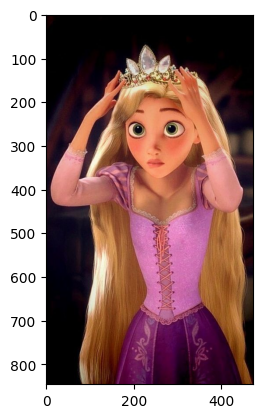

In [2]:
img= cv2.imread(r"C:\Users\Hp\Desktop\College\Summer Projects IEEE\HKN\image.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

GRAY SCALING

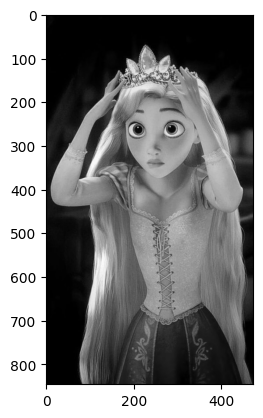

In [3]:
img_grey= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grey,cmap='gray')
plt.show()

RESIZING IMAGE

In [4]:
resized_img = cv2.resize(img_grey, (img_grey.shape[1]//10, img_grey.shape[0]//10))

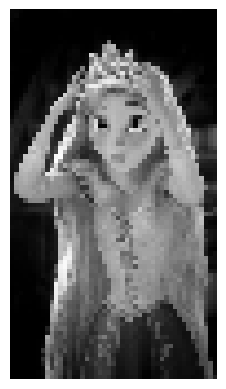

In [5]:
plt.imshow(resized_img, cmap='gray')
plt.axis('off')
plt.show()

THRESHOLDING

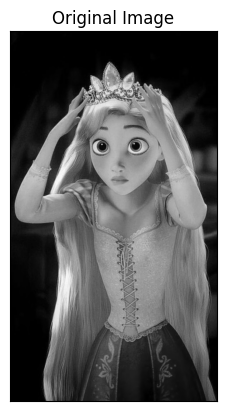

In [6]:
plt.imshow(img_grey, 'gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.show()

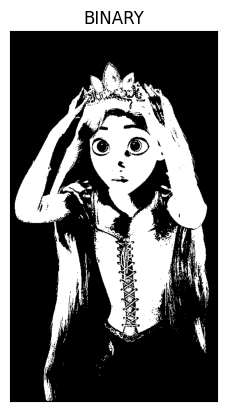

In [7]:
ret, thresh_binary = cv2.threshold(img_grey, 127, 255, cv2.THRESH_BINARY)

# Display Binary Threshold result
plt.imshow(thresh_binary, 'gray', vmin=0, vmax=255)
plt.title('BINARY')
plt.xticks([]), plt.yticks([])
plt.show()

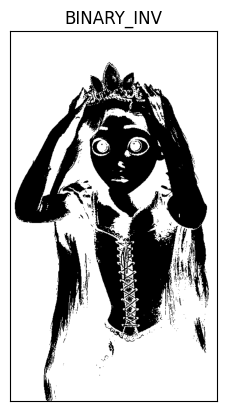

In [8]:
ret, thresh_binary_inv = cv2.threshold(img_grey, 127, 255, cv2.THRESH_BINARY_INV)

# Display Binary Inverse Threshold result
plt.imshow(thresh_binary_inv, 'gray', vmin=0, vmax=255)
plt.title('BINARY_INV')
plt.xticks([]), plt.yticks([])
plt.show()

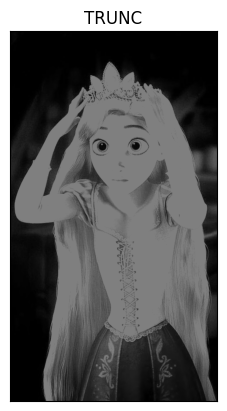

In [9]:
# Apply Truncate Threshold
ret, thresh_trunc = cv2.threshold(img_grey, 127, 255, cv2.THRESH_TRUNC)

# Display Truncate Threshold result
plt.imshow(thresh_trunc, 'gray', vmin=0, vmax=255)
plt.title('TRUNC')
plt.xticks([]), plt.yticks([])
plt.show()

CANNY EDGE DETECTION

In [10]:
edges = cv2.Canny(img_grey, 100, 200)

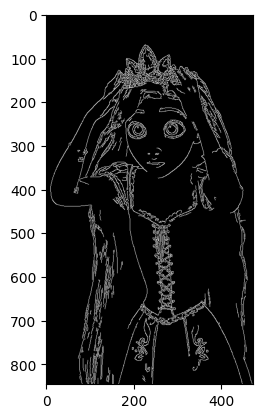

In [11]:
plt.imshow(edges, cmap='gray')
plt.show()

# KMeans Clustering

In [12]:
import numpy as np
from sklearn.cluster import KMeans

In [13]:
pixel_values= img.reshape((-1,3))
pixel_values= np.float32(pixel_values)

In [14]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixel_values)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

centers = np.uint8(centers)

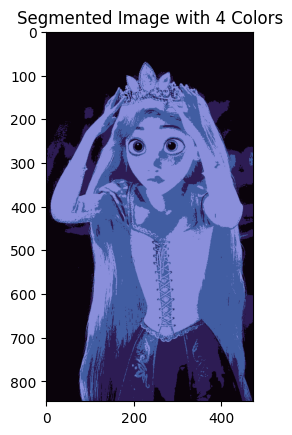

In [15]:
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

plt.imshow(segmented_image)
plt.title(f'Segmented Image with {k} Colors')
plt.show()


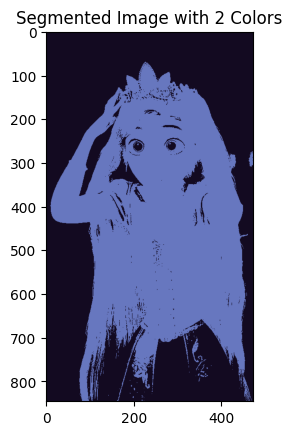

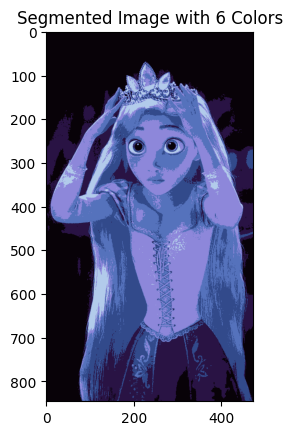

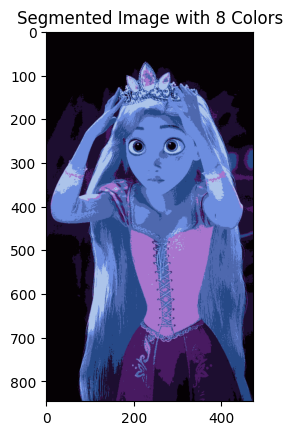

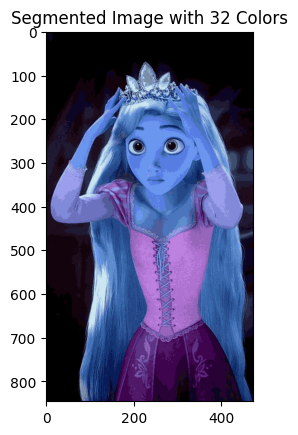

In [16]:
for k in [2, 6, 8, 32]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)
    centers = np.uint8(kmeans.cluster_centers_)
    segmented_image = centers[kmeans.labels_.flatten()].reshape(img.shape)

    plt.imshow(segmented_image)
    plt.title(f'Segmented Image with {k} Colors')
    plt.show()